<a href="https://colab.research.google.com/github/sadaqatulmuntaha80-sudo/Predictive-Analytics-for-Breast-Cancer/blob/main/Final_of_MIS444.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#Data Loading

In [ ]:
from google.colab import files
import pandas as pd

data = pd.read_csv("breast-cancer.csv")
print(data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

# Descriptive Analysis

In [ ]:
# Descriptive Analysis
print("\n--- Shape ---")
print(data.shape)

print("\n--- Columns ---")
print(data.columns)

print("\n--- Info ---")
print(data.info())

print("\n--- Missing values ---")
print(data.isnull().sum())

print("\n--- Class Distribution ---")
print(data['diagnosis'].value_counts())   # assuming "diagnosis" is target

print("\n--- Summary Statistics ---")
print(data.describe())



--- Shape ---
(569, 32)

--- Columns ---
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis             


# Visualization

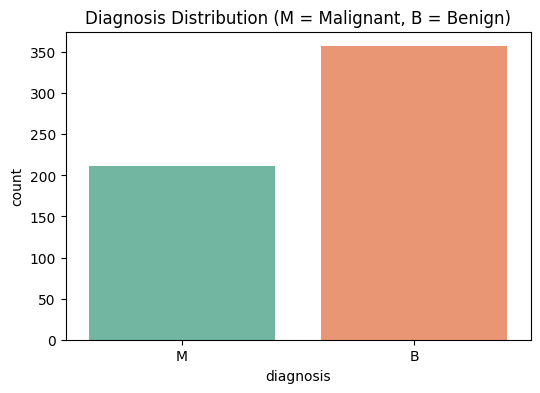

In [ ]:
# Basic Visualization
# ===============================
plt.figure(figsize=(6,4))
sns.countplot(x="diagnosis", data=data, palette="Set2")
# Add title and display the plot
plt.title("Diagnosis Distribution (M = Malignant, B = Benign)")

plt.show()


# Correlation heatmap

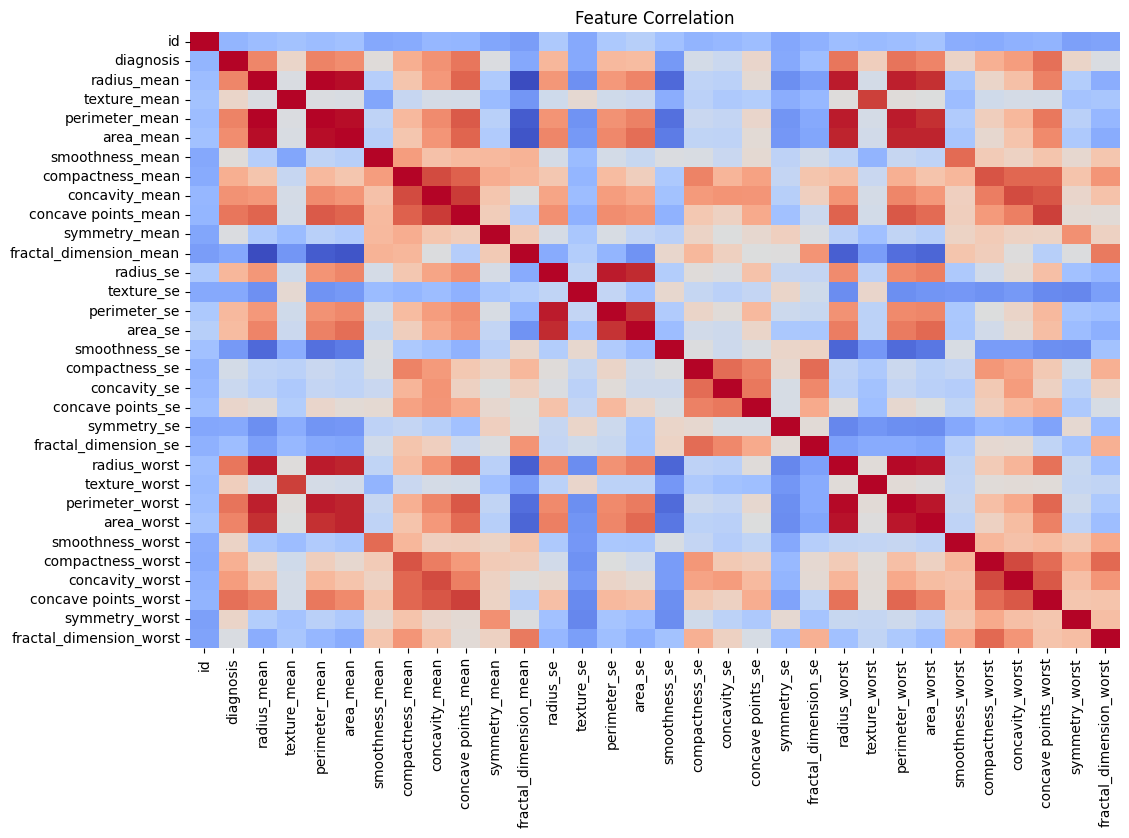

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap="coolwarm", cbar=False)
plt.title("Feature Correlation")
plt.show()


# **2) Feature Engineering (Preprocessing)**

In [ ]:
# Feature Engineering (Preprocessing)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume 'diagnosis' is target (M = malignant, B = benign)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis'].map({'M':1, 'B':0})   # Convert categorical to numeric

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


X_train shape: (455, 31)
X_test shape: (114, 31)
y_train distribution:
 diagnosis
0    285
1    170
Name: count, dtype: int64
y_test distribution:
 diagnosis
0    72
1    42
Name: count, dtype: int64


# Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate the target column ('diagnosis') from the features
X = data.drop(columns=['diagnosis'])
y = data['diagnosis'].map({'B': 0, 'M': 1})  # Convert 'B' to 0 (Benign) and 'M' to 1 (Malignant)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data with the already fitted scaler (no fitting)
X_test_scaled = scaler.transform(X_test)


print("Scaled Training Data (first 5 rows):")
print(X_train_scaled[:5])


Scaled Training Data (first 5 rows):
[[-2.43221088e-01  5.18558727e-01  8.91825791e-01  4.24631702e-01
   3.83925436e-01 -9.74743706e-01 -6.89771505e-01 -6.88586446e-01
  -3.98175254e-01 -1.03915470e+00 -8.25056321e-01 -1.09317755e-01
  -5.59755400e-02 -2.10096206e-01 -1.59132582e-02 -1.00518399e+00
  -9.11941990e-01 -6.62815884e-01 -6.52561081e-01 -7.01889114e-01
  -2.75393571e-01  5.79797697e-01  1.31324246e+00  4.66908134e-01
   4.45982711e-01 -5.96154777e-01 -6.34722227e-01 -6.10227299e-01
  -2.35743918e-01  5.45663235e-02  2.18367276e-02]
 [ 4.08373367e-01 -5.16364088e-01 -1.63971029e+00 -5.41348716e-01
  -5.42961327e-01  4.76219058e-01 -6.31833818e-01 -6.04281166e-01
  -3.03074908e-01  5.21543093e-01 -4.54522896e-01 -6.04377961e-01
  -1.00104604e+00 -5.85429002e-01 -4.93453793e-01  4.03212009e-01
  -7.68173276e-01 -4.79187222e-01  1.14508478e-01 -1.42950761e-01
  -5.77397732e-01 -5.82458953e-01 -1.69029101e+00 -6.11934288e-01
  -5.87013537e-01  2.73581959e-01 -8.14844486e-01 -7.1

# **Model Training**

# 1. Logistic Regression




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=500)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("Classification Report:")
print(classification_report(y_test, y_pred_log))



Logistic Regression Accuracy: 0.9122807017543859
Confusion Matrix:
[[71  1]
 [ 9 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93        72
           1       0.97      0.79      0.87        42

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114



# 2. Random Forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest model with 200 estimators
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9736842105263158
Confusion Matrix:
[[72  0]
 [ 3 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



# 3. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SVM model with RBF kernel
svc = SVC(kernel='rbf', probability=True, random_state=42)

# Fit the model on the training data
svc.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_svc = svc.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))


SVM Accuracy: 0.631578947368421
Confusion Matrix:
[[72  0]
 [42  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



# 4. K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the KNN model with 11 neighbors
knn_model = KNeighborsClassifier(n_neighbors=11)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.6842105263157895
Confusion Matrix:
[[66  6]
 [30 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        72
           1       0.67      0.29      0.40        42

    accuracy                           0.68       114
   macro avg       0.68      0.60      0.59       114
weighted avg       0.68      0.68      0.64       114



# 5. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_nb = nb_model.predict(X_test)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.6228070175438597
Confusion Matrix:
[[71  1]
 [42  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.99      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.62       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.40      0.62      0.48       114



# 6. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Decision Tree model with random_state for reproducibility
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9210526315789473
Confusion Matrix:
[[68  4]
 [ 5 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        72
           1       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



# 7. XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBoost model with specific hyperparameters
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9736842105263158
Confusion Matrix:
[[72  0]
 [ 3 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



# **Hyperparameter Optimization**

# Random Forest Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the GridSearchCV with Random Forest and the defined parameter grid
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2,  # Print progress during the search
    scoring='accuracy'  # Optimize for accuracy
)

# Fit the GridSearchCV on the training data
grid_search_rf.fit(X_train, y_train)

# Output the best parameters found by GridSearchCV
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Get the best model (Random Forest with optimal parameters)
best_rf = grid_search_rf.best_estimator_

# Predict on the test data using the best model
y_pred_rf_best = best_rf.predict(X_test)

# Evaluation of the best model
print("Random Forest Optimized Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_best))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Optimized Accuracy: 0.9649122807017544
Confusion Matrix:
[[72  0]
 [ 4 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



# XGBoost Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 0.9, 1.0],
}

# Initialize the GridSearchCV with XGBoost and the defined parameter grid
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2,  # Print progress during the search
    scoring='accuracy'  # Optimize for accuracy
)

# Fit the GridSearchCV on the training data
grid_search_xgb.fit(X_train, y_train)

# Output the best parameters found by GridSearchCV
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# Get the best model (XGBoost with optimal parameters)
best_xgb = grid_search_xgb.best_estimator_

# Predict on the test data using the best model
y_pred_xgb_best = best_xgb.predict(X_test)

# Evaluation of the best model
print("XGBoost Optimized Accuracy:", accuracy_score(y_test, y_pred_xgb_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_best))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
XGBoost Optimized Accuracy: 0.9649122807017544
Confusion Matrix:
[[72  0]
 [ 4 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



# **Performance Comparison**

# ROC Curves

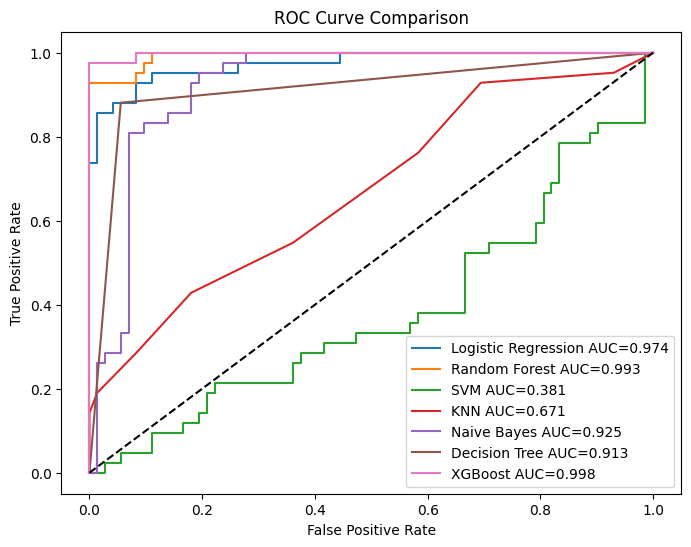

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define the models dictionary to loop through
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "SVM": svc,
    "KNN": knn_model,
    "Naive Bayes": nb_model,
    "Decision Tree": dt_model,
    "XGBoost": xgb_model
}

# Plotting ROC Curve for each model
plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Predict probabilities for the positive class (index 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)

    # Plot the ROC curve for the current model
    plt.plot(fpr, tpr, label=f"{name} AUC={auc:.3f}")

# Plot diagonal line for no-skill classifier
plt.plot([0, 1], [0, 1], 'k--')

# Adding labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


# Confusion Matrix

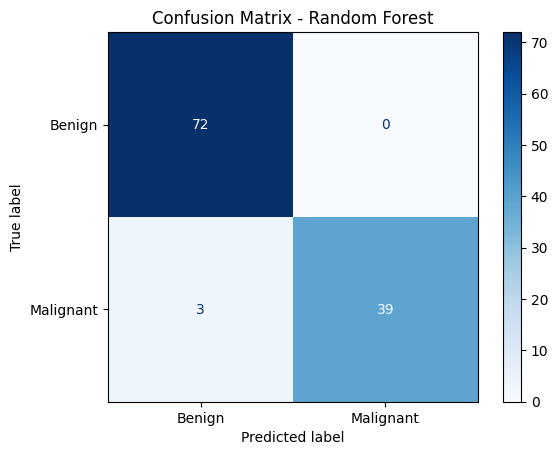

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have trained a model and have predictions (e.g., for Random Forest)
y_pred = rf_model.predict(X_test)  # Replace 'rf_model' with your trained model

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])

# Plot the confusion matrix
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")  # Change model name accordingly
plt.show()


# **Result Interpretation**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import pandas as pd

# Store results in a list
results = []

# Loop through each model to calculate the necessary metrics
for name, model in models.items():
    # Predict the labels and probabilities
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Precision
    prec = precision_score(y_test, y_pred)

    # Recall
    rec = recall_score(y_test, y_pred)

    # F1-Score
    f1 = f1_score(y_test, y_pred)

    # AUC
    auc = roc_auc_score(y_test, y_pred_prob)

    # Append the results for this model
    results.append([name, acc, prec, rec, f1, auc])

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"])

# Set the model names as index
results_df.set_index("Model", inplace=True)

# Display the results
print(results_df)


                     Accuracy  Precision    Recall  F1 Score       AUC
Model                                                                 
Logistic Regression  0.912281   0.970588  0.785714  0.868421  0.973876
Random Forest        0.973684   1.000000  0.928571  0.962963  0.993056
SVM                  0.631579   0.000000  0.000000  0.000000  0.380952
KNN                  0.684211   0.666667  0.285714  0.400000  0.670966
Naive Bayes          0.622807   0.000000  0.000000  0.000000  0.924603
Decision Tree        0.921053   0.902439  0.880952  0.891566  0.912698
XGBoost              0.973684   1.000000  0.928571  0.962963  0.998016
